# Import libraries

In [625]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Load data

In [628]:
df = pd.read_csv(r"C:\Users\admin\Desktop\Project\Bank Customer Churn Prediction\train.csv")
df.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


# Check data quality

In [631]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [633]:
df.isna().sum() / len(df)

id                 0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

## Drop unuseful columns

In [636]:
df = df.drop(["id","CustomerId", "Surname"], axis = 1)
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


## EDA

In [639]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


Exited
0    0.788401
1    0.211599
Name: proportion, dtype: float64


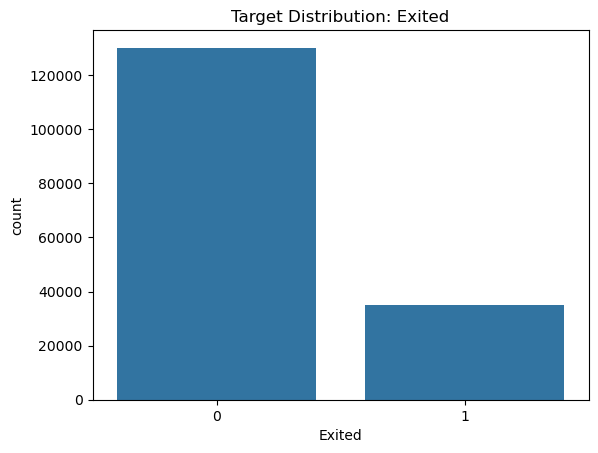

In [641]:
# Kiểm tra phân phối biến mục tiêu
print(df['Exited'].value_counts(normalize=True))

# Vẽ biểu đồ phân phối target
sns.countplot(x='Exited', data=df)
plt.title('Target Distribution: Exited')
plt.show()


In [642]:
#Sort columns into categorical and numerical datatypes
num_cols = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Tenure']
cat_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

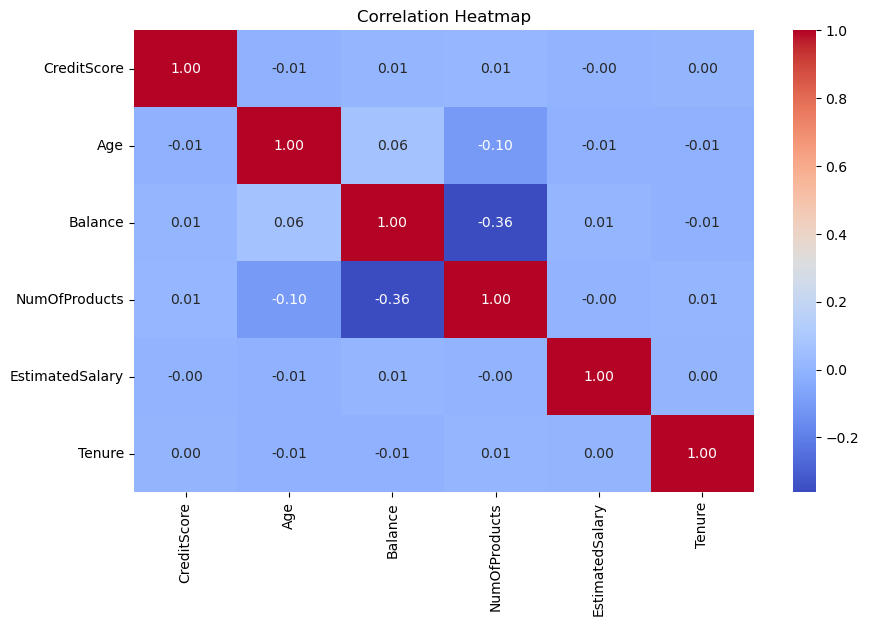

In [643]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chỉ chọn các cột số
numeric_df = df[num_cols]

# Vẽ heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


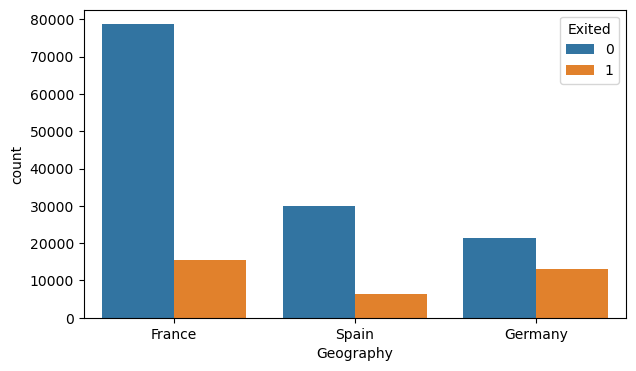

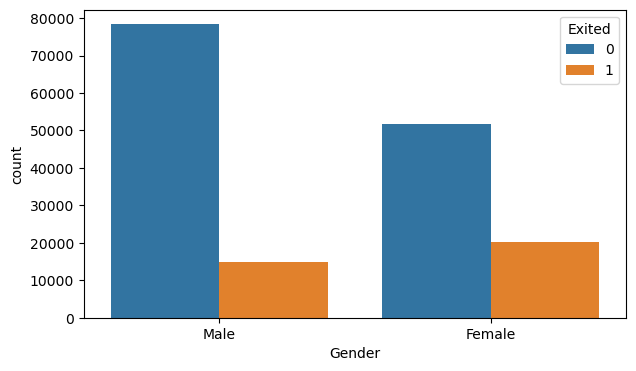

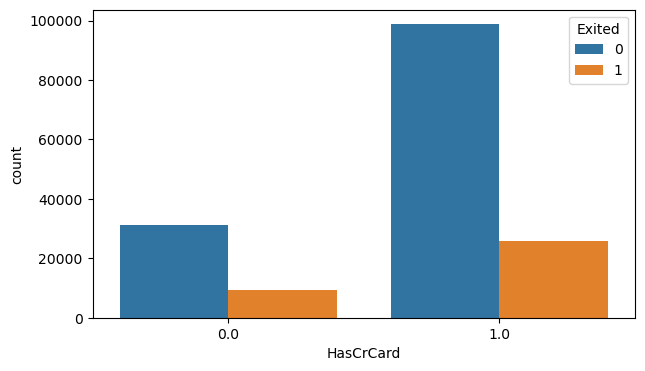

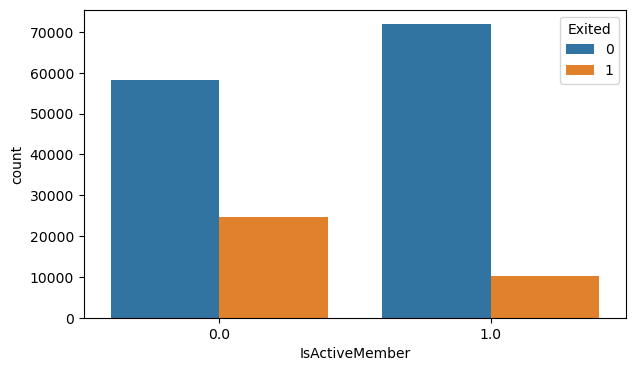

In [644]:
for feature in cat_cols:
    if feature == "Exited":
        continue
    
    plt.subplots(figsize=(7, 4))
    sns.countplot(data=df, x=feature, hue='Exited')
    plt.show()

# Define Preprocessing Class

In [648]:
class Preprocessor:
    def __init__(self):
        self.scaler = StandardScaler()
        self.categorical_cols = ['Geography', 'Gender']
        self.feature_cols = None

    def fit(self, df):
        df = pd.get_dummies(df, columns=self.categorical_cols, drop_first=True)
        self.feature_cols = df.columns.drop('Exited')
        df[self.feature_cols] = self.scaler.fit_transform(df[self.feature_cols])
        return df

    def transform(self, df):
        df = pd.get_dummies(df, columns=self.categorical_cols, drop_first=True)
        missing_cols = set(self.feature_cols) - set(df.columns)
        for col in missing_cols:
            df[col] = 0
        df = df[self.feature_cols].copy()
        df[self.feature_cols] = self.scaler.transform(df[self.feature_cols])
        return df

# Fit Preprocessing and Prepare Training Data

In [651]:
preprocessor = Preprocessor()
df = preprocessor.fit(df)

X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Target distribution before SMOTE:\n", y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Target distribution after SMOTE:\n", pd.Series(y_train_res).value_counts())


Target distribution before SMOTE:
 Exited
0    104090
1     27937
Name: count, dtype: int64
Target distribution after SMOTE:
 Exited
0    104090
1    104090
Name: count, dtype: int64


# Define Model Evaluation Function

In [653]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n{'='*50}")
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"ROC AUC: {auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    return fpr, tpr, auc


# Train and Evaluate Models

Training Logistic Regression...

Model: Logistic Regression
Accuracy: 0.7562
ROC AUC: 0.8160

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83     26023
           1       0.45      0.73      0.56      6984

    accuracy                           0.76     33007
   macro avg       0.68      0.75      0.70     33007
weighted avg       0.82      0.76      0.77     33007



<Figure size 1000x800 with 0 Axes>

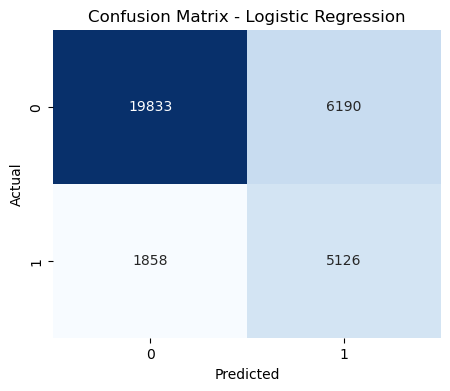

Training Random Forest...

Model: Random Forest
Accuracy: 0.8475
ROC AUC: 0.8701

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90     26023
           1       0.64      0.63      0.63      6984

    accuracy                           0.85     33007
   macro avg       0.77      0.77      0.77     33007
weighted avg       0.85      0.85      0.85     33007



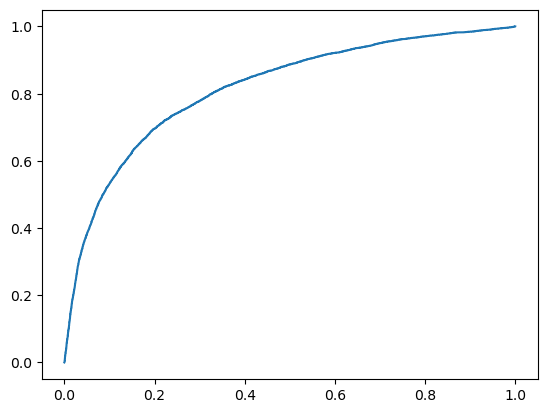

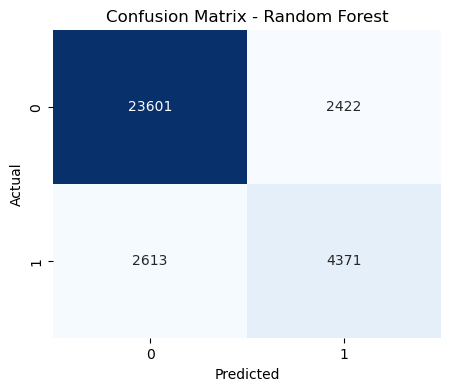

Training XGBoost...

Model: XGBoost
Accuracy: 0.8600
ROC AUC: 0.8857

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     26023
           1       0.69      0.62      0.65      6984

    accuracy                           0.86     33007
   macro avg       0.79      0.77      0.78     33007
weighted avg       0.86      0.86      0.86     33007



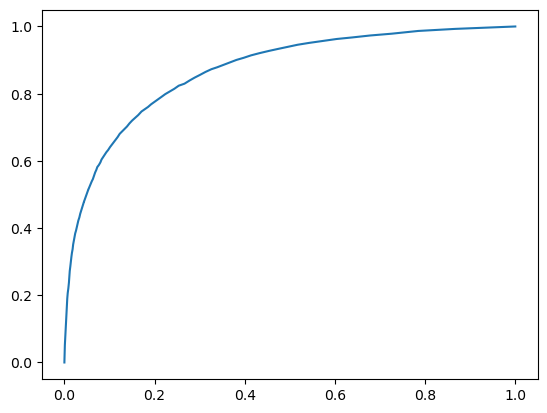

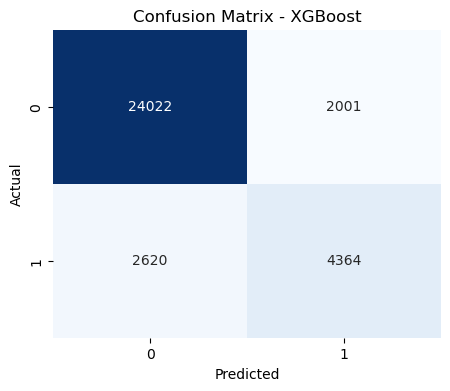

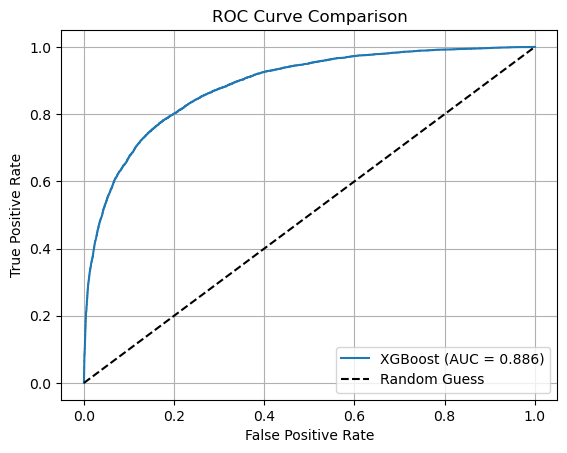

In [655]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
}

plt.figure(figsize=(10, 8))
for name, model in models.items():
    print(f"Training {name}...")
    if name == 'XGBoost':
        model.fit(X_train_res, y_train_res,
                  eval_set=[(X_test, y_test)],
                  verbose=False)
    else:
        model.fit(X_train_res, y_train_res)

    fpr, tpr, auc = evaluate_model(name, model, X_test, y_test)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Predict for New Data

In [662]:
df_new = pd.read_csv(r"C:\Users\admin\Desktop\Project\Bank Customer Churn Prediction\test.csv")

X_new = preprocessor.transform(df_new)

selected_model = models['XGBoost']
y_pred_new = selected_model.predict(X_new)

print("Predictions for New Data:")
y_pred_new


Predictions for New Data:


array([0, 0, 0, ..., 0, 0, 0])

In [664]:
import numpy as np
unique, counts = np.unique(y_pred_new, return_counts=True)
print(dict(zip(unique, counts)))


{0: 8081, 1: 1919}
